In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from google.colab import files

# concept keywords

In [2]:
keywords = {}

keywords['Time'] = [
    "day", "night", "week", "month", "year", "hour", "minute", "second", "now", "soon",
    "later", "early", "late", "morning", "evening", "noon", "midnight", "dawn", "dusk", "past",
    "present", "future", "before", "after", "yesterday", "today", "tomorrow", "next", "previous", "soon",
    "instant", "era", "age", "decade", "century", "millennium",
    "moment", "pause", "wait", "begin", "start", "end", "finish", "stop", "continue",
    "forever", "constant", "frequent",
    "occasion", "season", "spring", "summer", "autumn", "fall", "winter", "anniversary", "deadline", "schedule",
    "calendar", "clock", "duration", "interval", "epoch", "generation", "period", "cycle", "timespan",
    "shift", "quarter", "term", "phase", "lifetime", "century", "minute", "timeline", "delay",
    "prompt", "timely", "recurrent", "daily", "weekly", "monthly", "yearly", "annual", "biweekly", "timeframe"
]

keywords['Calendar'] = [
    "day", "night", "week", "month", "year", "hour", "minute", "second",
    "morning", "evening", "noon", "midnight", "dawn", "dusk",
    "yesterday", "today", "tomorrow",
    "decade", "century", "millennium",
    "season", "spring", "summer", "autumn", "fall", "winter",
    "calendar", "clock",
    "century", "minute",
    "daily", "weekly", "monthly", "yearly", "annual", "biweekly", "timeframe"
]

keywords['People/Roles'] = [
                "man", "girl", "boy", "kid", "dad", "mom", "son", "sis", "bro",
                "chief", "priest", "king", "queen", "duke", "lord", "friend", "clerk", "coach",
                "nurse", "doc", "maid", "clown", "guest", "peer",
                "punk", "nerd", "jock", "chief"
]

keywords['Nature'] = [
    "tree", "grass", "stone", "rock", "cliff", "hill",
    "dirt", "sand", "mud", "wind", "storm", "rain", "cloud", "sun",
    "moon", "leaf", "branch", "twig", "root", "bark", "seed",
    "tide", "lake", "pond", "creek", "sea", "wood", "field",
    "shore", "snow", "ice", "flame", "fire", "fog", "dew", "hail",
    "sky", "earth", "glade", "cave", "peak", "ridge", "dust", "air",
    "mist", "heat"
]

keywords['Emotions'] = [
    "joy", "glee", "pride", "grief", "fear", "hope", "love", "hate", "pain", "shame",
    "bliss", "rage", "calm", "shock", "dread", "guilt", "peace", "trust", "scorn", "doubt",
    "hurt", "wrath", "laugh", "cry", "smile", "frown", "gasp", "blush", "sigh", "grin",
    "woe", "spite", "envy", "glow", "thrill", "mirth", "bored", "cheer", "charm", "grace",
    "shy", "brave", "proud", "glad", "mad", "sad", "tense", "free", "kind"
]

keywords['MonthNames'] = [
    "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"
]

keywords['Countries'] = [
    "USA", "Canada", "Brazil", "Mexico", "Germany", "France", "Italy", "Spain", "UK", "Australia",
    "China", "Japan", "India", "Russia", "Korea", "Argentina", "Egypt", "Iran", "Turkey"
]

keywords['Biology'] = [
    "gene", "DNA", "RNA", "virus", "bacteria", "fungus",
    "brain", "lung", "blood", "bone", "skin", "muscle", "nerve", "vein", "organ",
    "evolve", "enzyme", "protein", "lipid", "membrane", "antibody", "antigen",
    "ligand", "substrate", "receptor", "cell", "chromosome", "nucleus", "cytoplasm"
]

# heatmpa

In [10]:
scores_dict['Time'].keys()

dict_keys(['num_unq_pairs', 'paired_SVCCA_1To1', 'rand_shuff_mean_SVCCA_1To1', 'rand_shuff_pval_SVCCA_1To1', 'paired_RSA_1To1', 'rand_shuff_mean_RSA_1To1', 'rand_shuff_pval_RSA_1To1'])

In [4]:
all_scores = {} # model A layer : dict of scores to other layers in model B
model_A_layers = [6, 10, 14, 17]
for layer_id in model_A_layers:
    with open(f'concept_scores_L{layer_id}_gemma.pkl', "rb") as f:
        layer_to_dictscores = pickle.load(f)
        all_scores[layer_id] = layer_to_dictscores

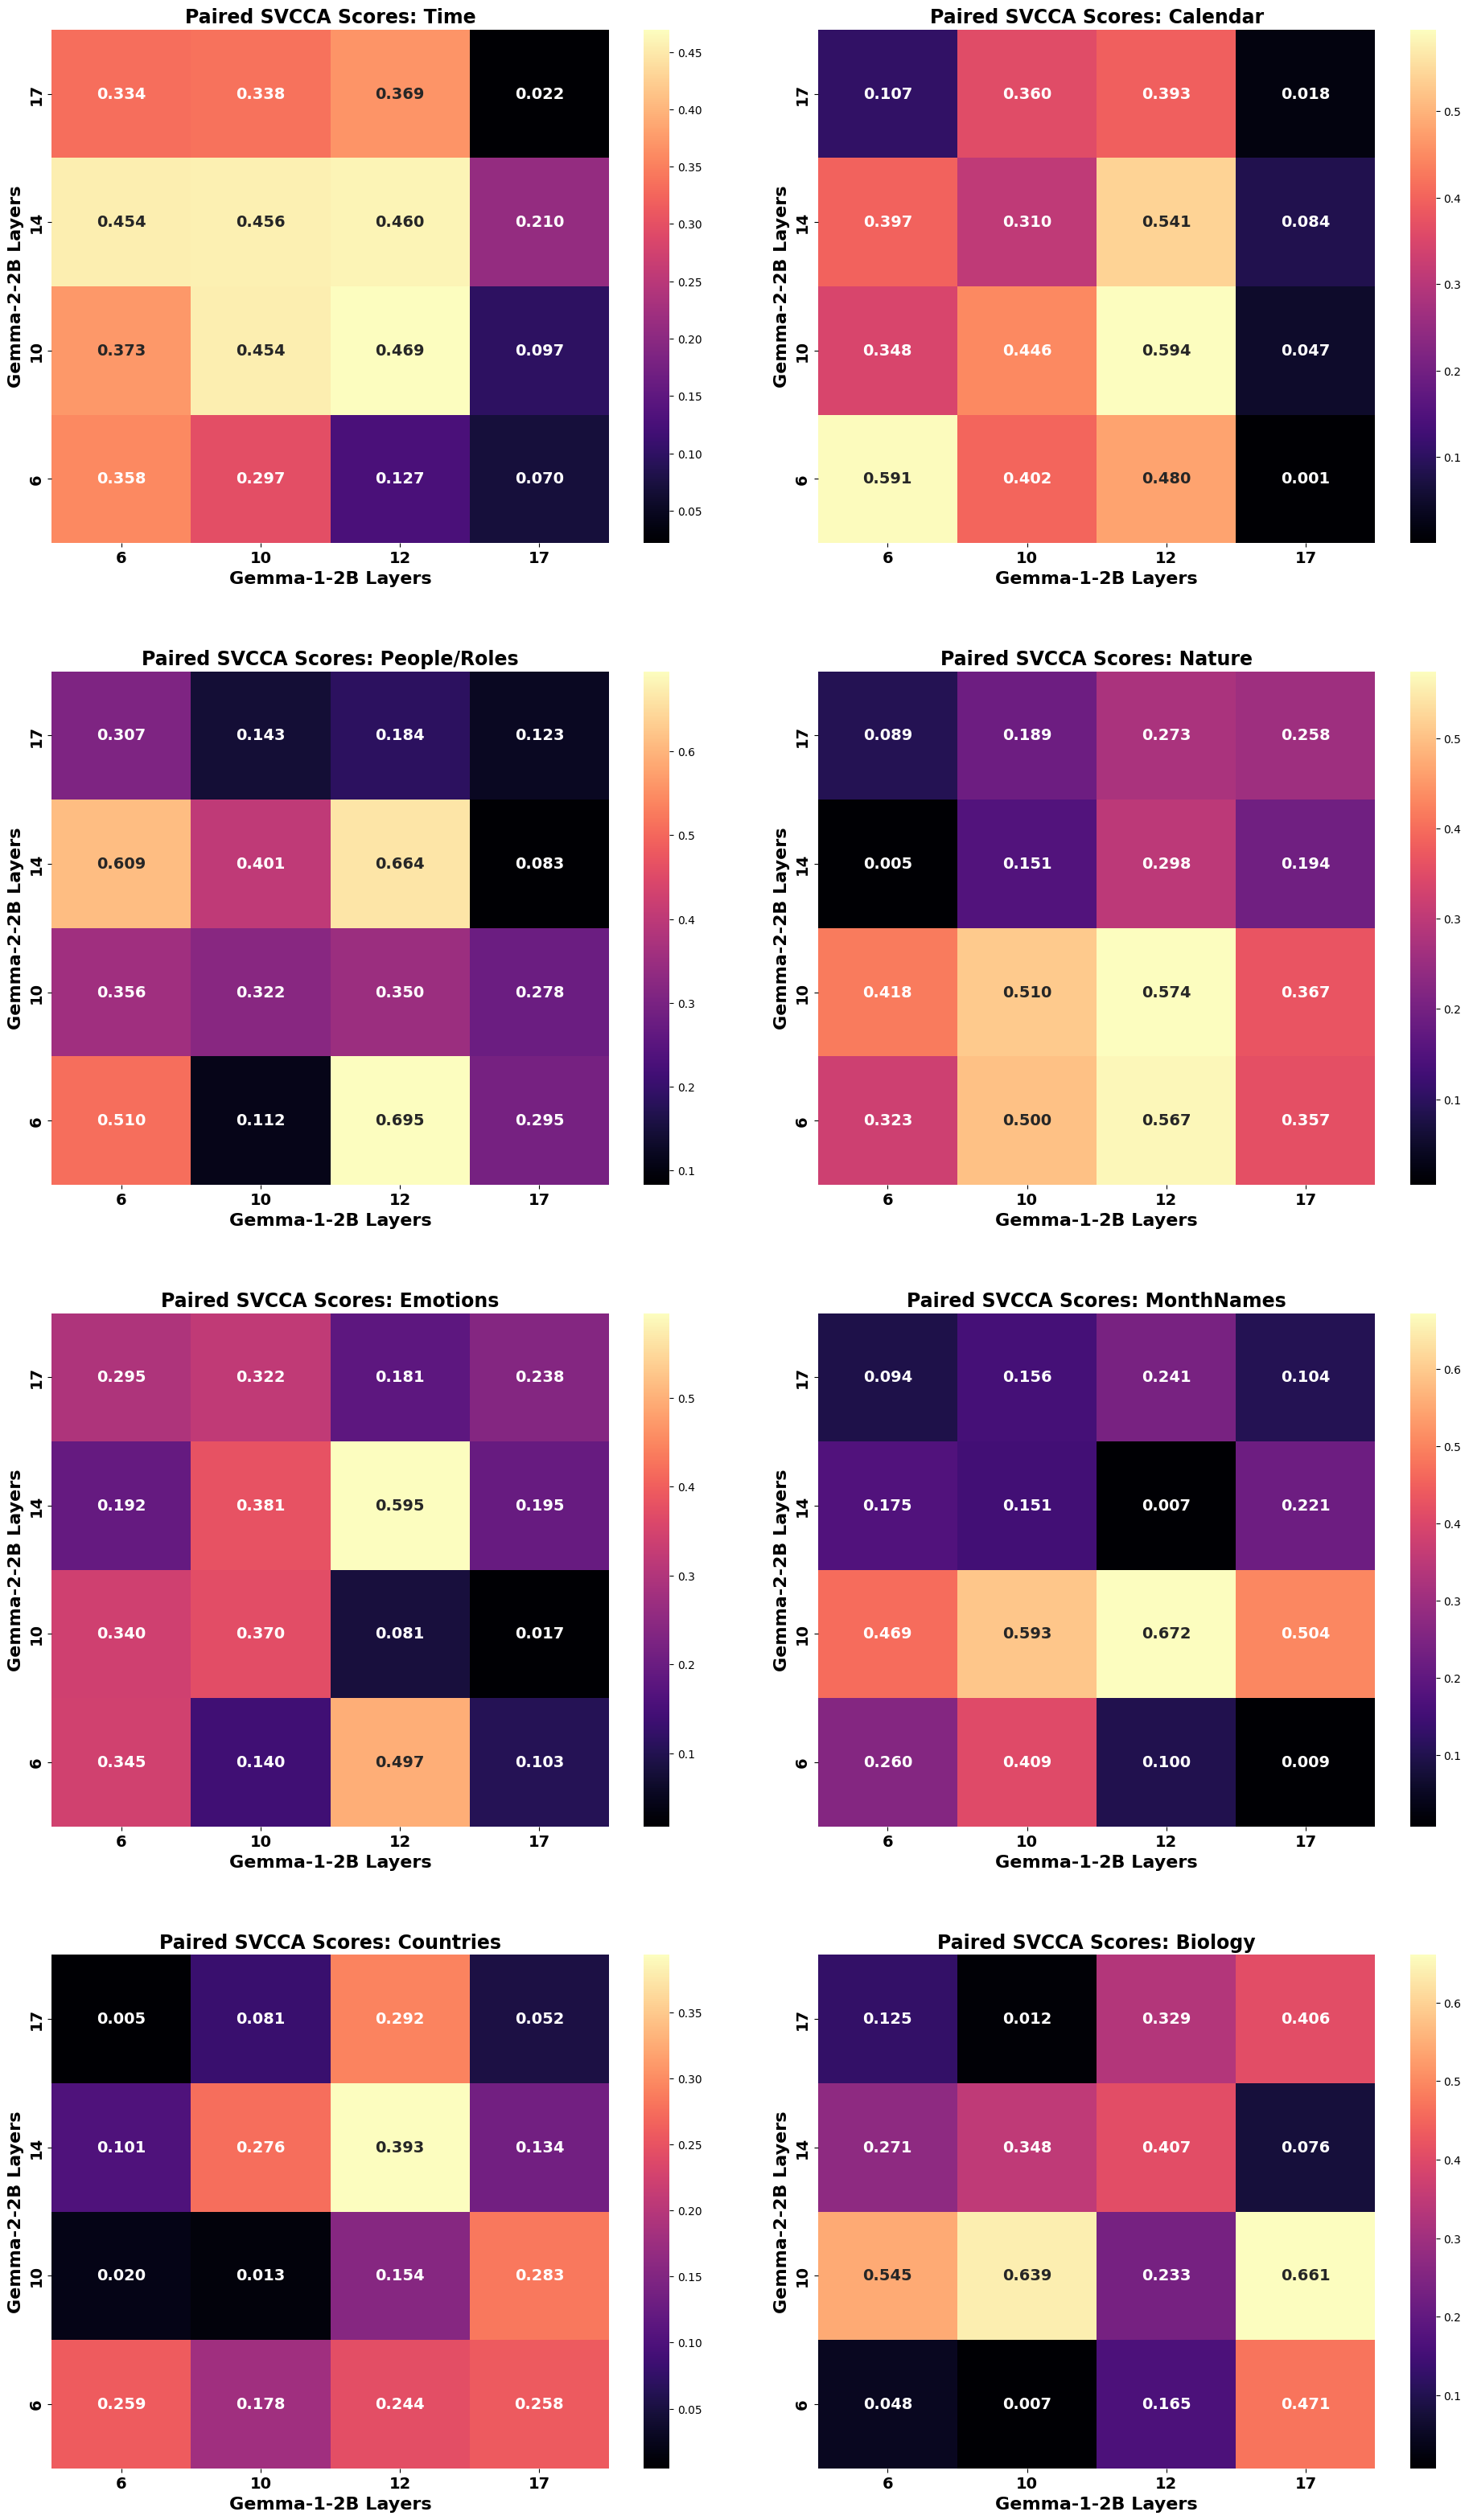

In [6]:
# Determine the size of the grid
num_concepts = len(keywords.keys())
num_cols = 2  # You can adjust this based on your preference
num_rows = (num_concepts + num_cols - 1) // num_cols  # Ensures enough rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 10, num_rows * 8))
fig.tight_layout(pad=5.0)  # Increase padding between plots

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each concept and plot
for i, concept in enumerate(keywords.keys()):

    all_scores_paired_svcca = {}

    for layerID_A, layer_to_dictscores in all_scores.items():
        layerID_A_scores = {}
        for layerID_B, scores_dict in layer_to_dictscores.items():
            if layerID_B != 0:
                score = scores_dict[concept]['paired_SVCCA_1To1']
                layerID_A_scores[layerID_B] = score
        all_scores_paired_svcca[layerID_A] = layerID_A_scores

    scores_df = pd.DataFrame(all_scores_paired_svcca).T

    # Plot heatmap on subplot with customized fonts and bold titles
    ax = sns.heatmap(scores_df, ax=axes[i], annot=True, cmap='magma', cbar=True, fmt=".3f",
                     annot_kws={"size": 14, "weight": 'bold'})
    ax.set_title("Paired SVCCA Scores: " + str(concept), fontsize=17, fontweight='bold')
    ax.set_ylabel("Gemma-2-2B Layers", fontsize=16, fontweight='bold')
    ax.set_xlabel("Gemma-1-2B Layers", fontsize=16, fontweight='bold')
    ax.invert_yaxis()

    # Customize tick labels for bold and larger size
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_fontweight('bold')

# Hide any unused axes if there are any
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

# Adjust subplot spacing (if needed)
plt.subplots_adjust(hspace=0.25, wspace=0.1)  # Adjust height and width spacing
plt.savefig('heatmap_comparison.pdf')
plt.show()


In [14]:
files.download('heatmap_comparison.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

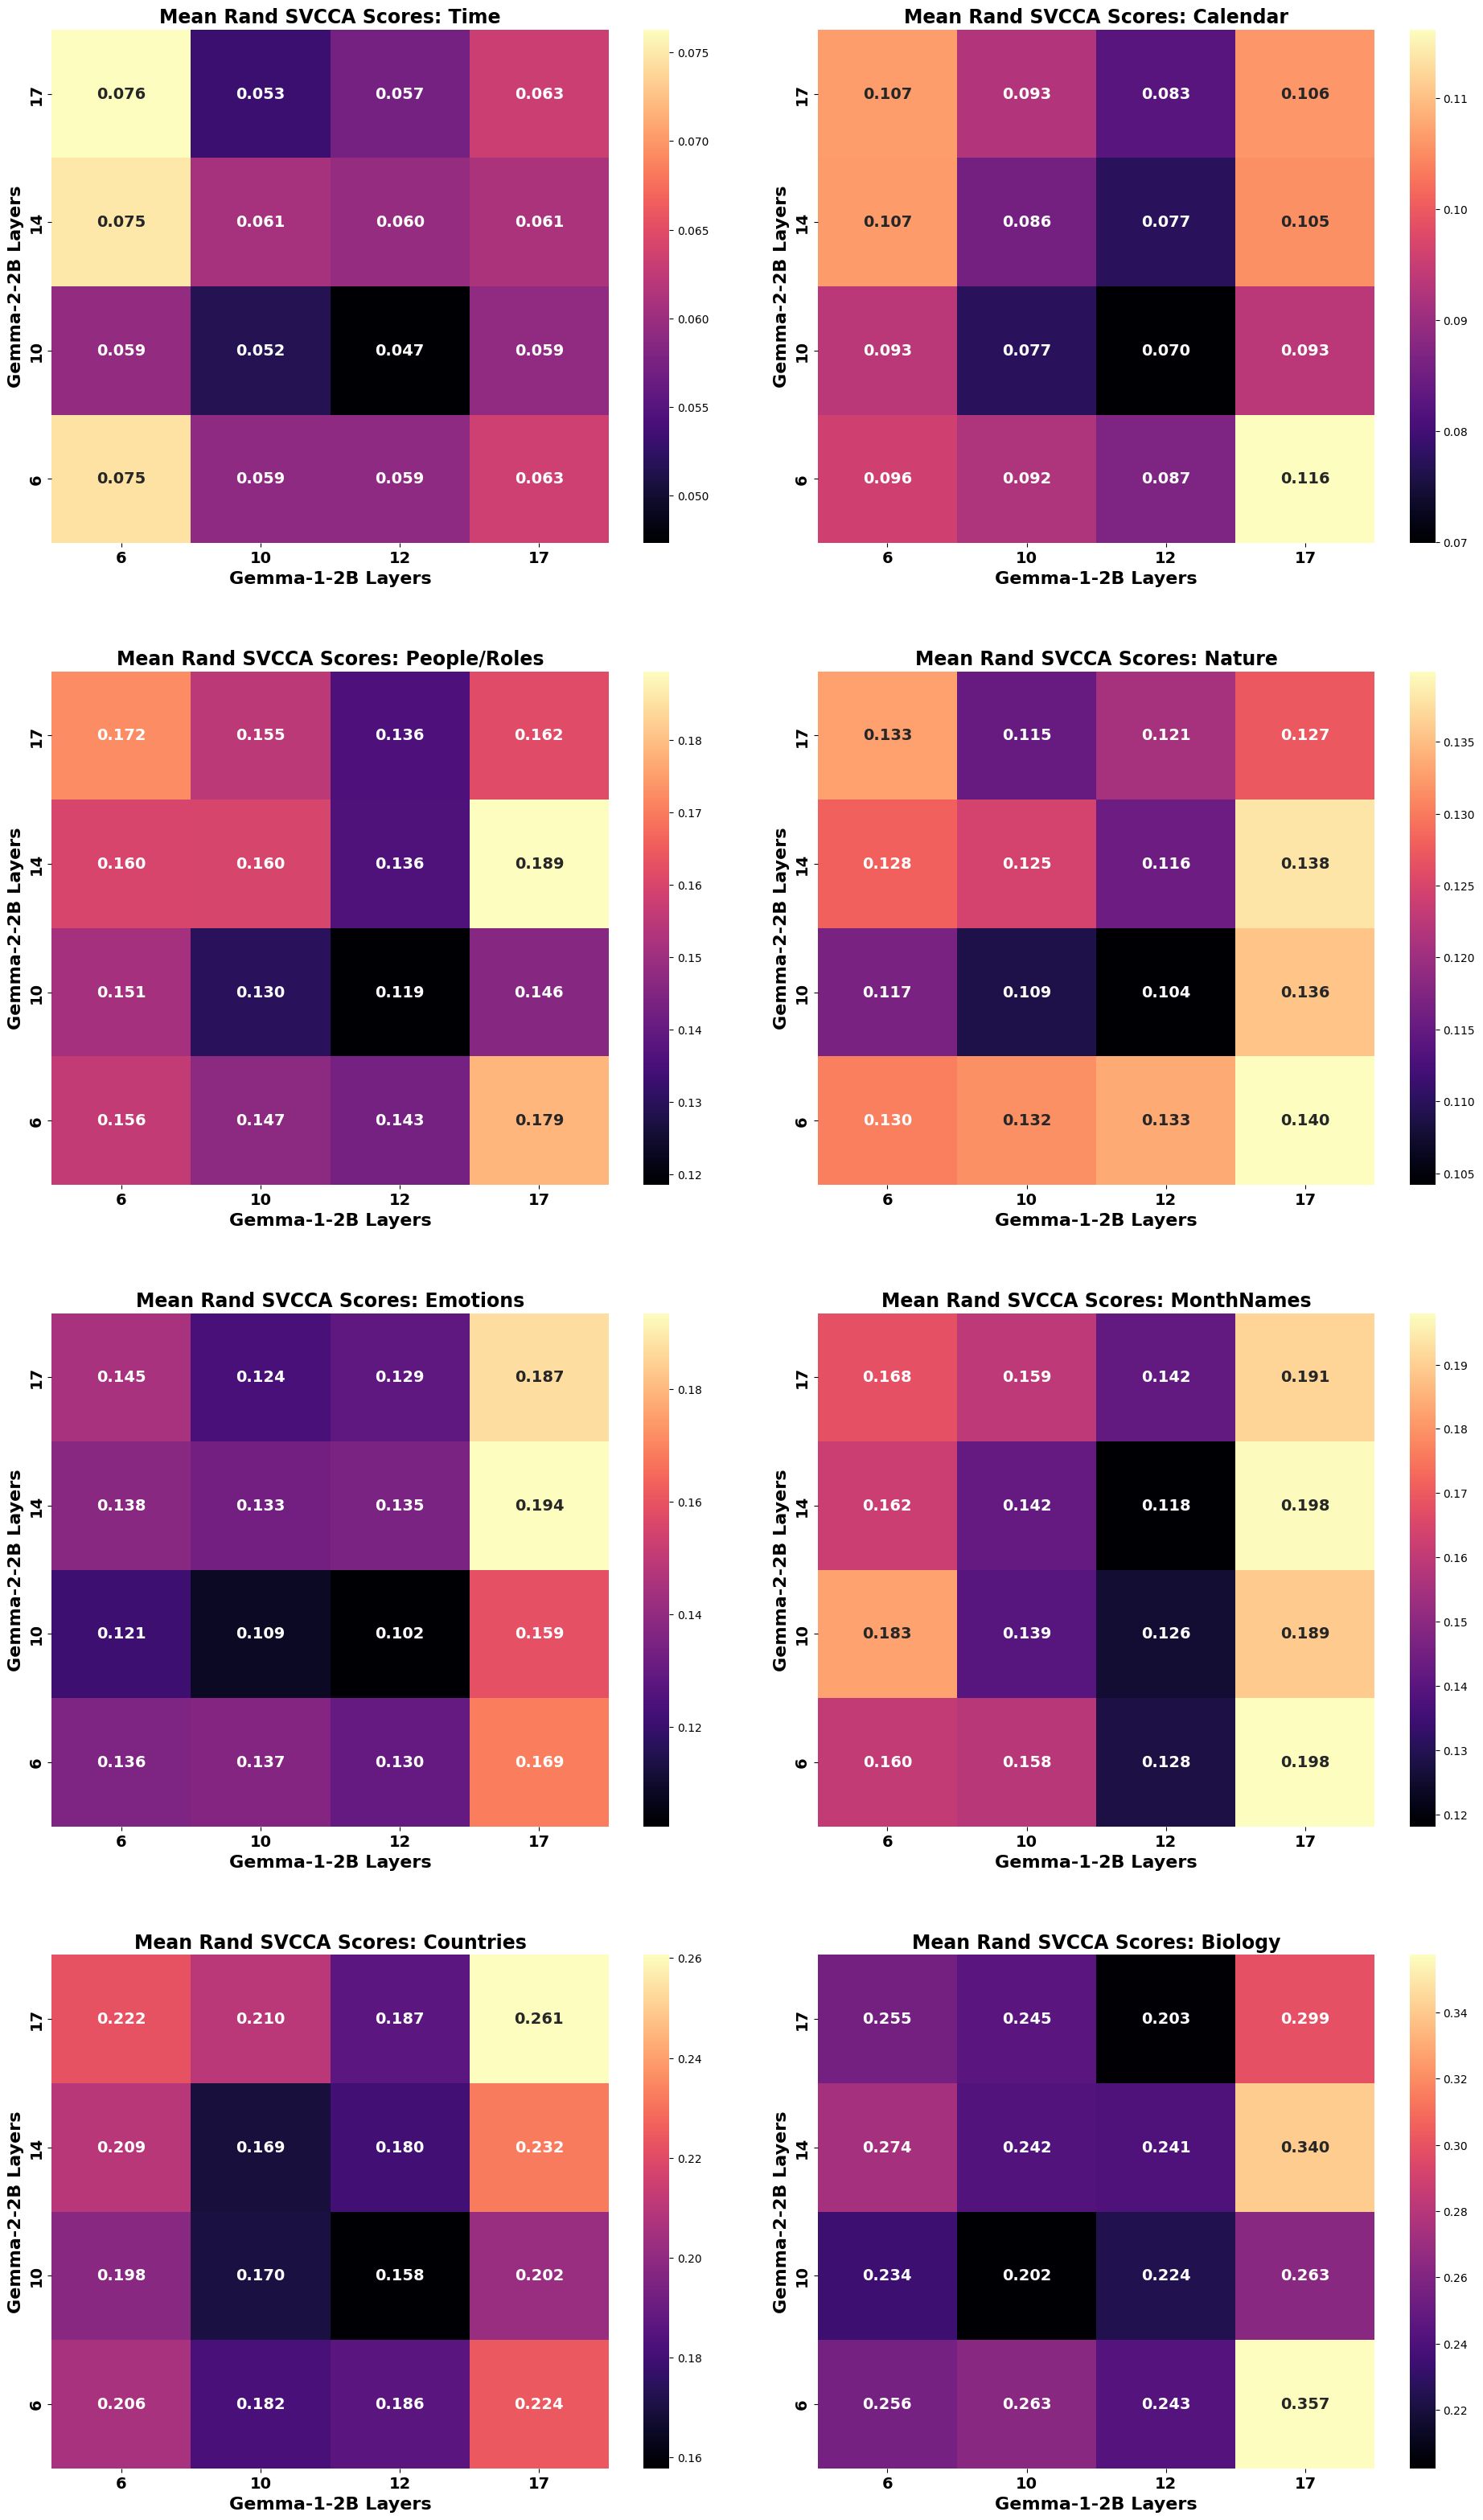

In [11]:
# Determine the size of the grid
num_concepts = len(keywords.keys())
num_cols = 2  # You can adjust this based on your preference
num_rows = (num_concepts + num_cols - 1) // num_cols  # Ensures enough rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 10, num_rows * 8))
fig.tight_layout(pad=5.0)  # Increase padding between plots

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each concept and plot
for i, concept in enumerate(keywords.keys()):

    all_scores_paired_svcca = {}

    for layerID_A, layer_to_dictscores in all_scores.items():
        layerID_A_scores = {}
        for layerID_B, scores_dict in layer_to_dictscores.items():
            if layerID_B != 0:
                score = scores_dict[concept]['rand_shuff_mean_SVCCA_1To1']
                layerID_A_scores[layerID_B] = score
        all_scores_paired_svcca[layerID_A] = layerID_A_scores

    scores_df = pd.DataFrame(all_scores_paired_svcca).T

    # Plot heatmap on subplot with customized fonts and bold titles
    ax = sns.heatmap(scores_df, ax=axes[i], annot=True, cmap='magma', cbar=True, fmt=".3f",
                     annot_kws={"size": 14, "weight": 'bold'})
    ax.set_title("Mean Rand SVCCA Scores: " + str(concept), fontsize=17, fontweight='bold')
    ax.set_ylabel("Gemma-2-2B Layers", fontsize=16, fontweight='bold')
    ax.set_xlabel("Gemma-1-2B Layers", fontsize=16, fontweight='bold')
    ax.invert_yaxis()

    # Customize tick labels for bold and larger size
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_fontweight('bold')

# Hide any unused axes if there are any
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

# Adjust subplot spacing (if needed)
plt.subplots_adjust(hspace=0.25, wspace=0.1)  # Adjust height and width spacing
plt.savefig('heatmap_comparison.pdf')
plt.show()


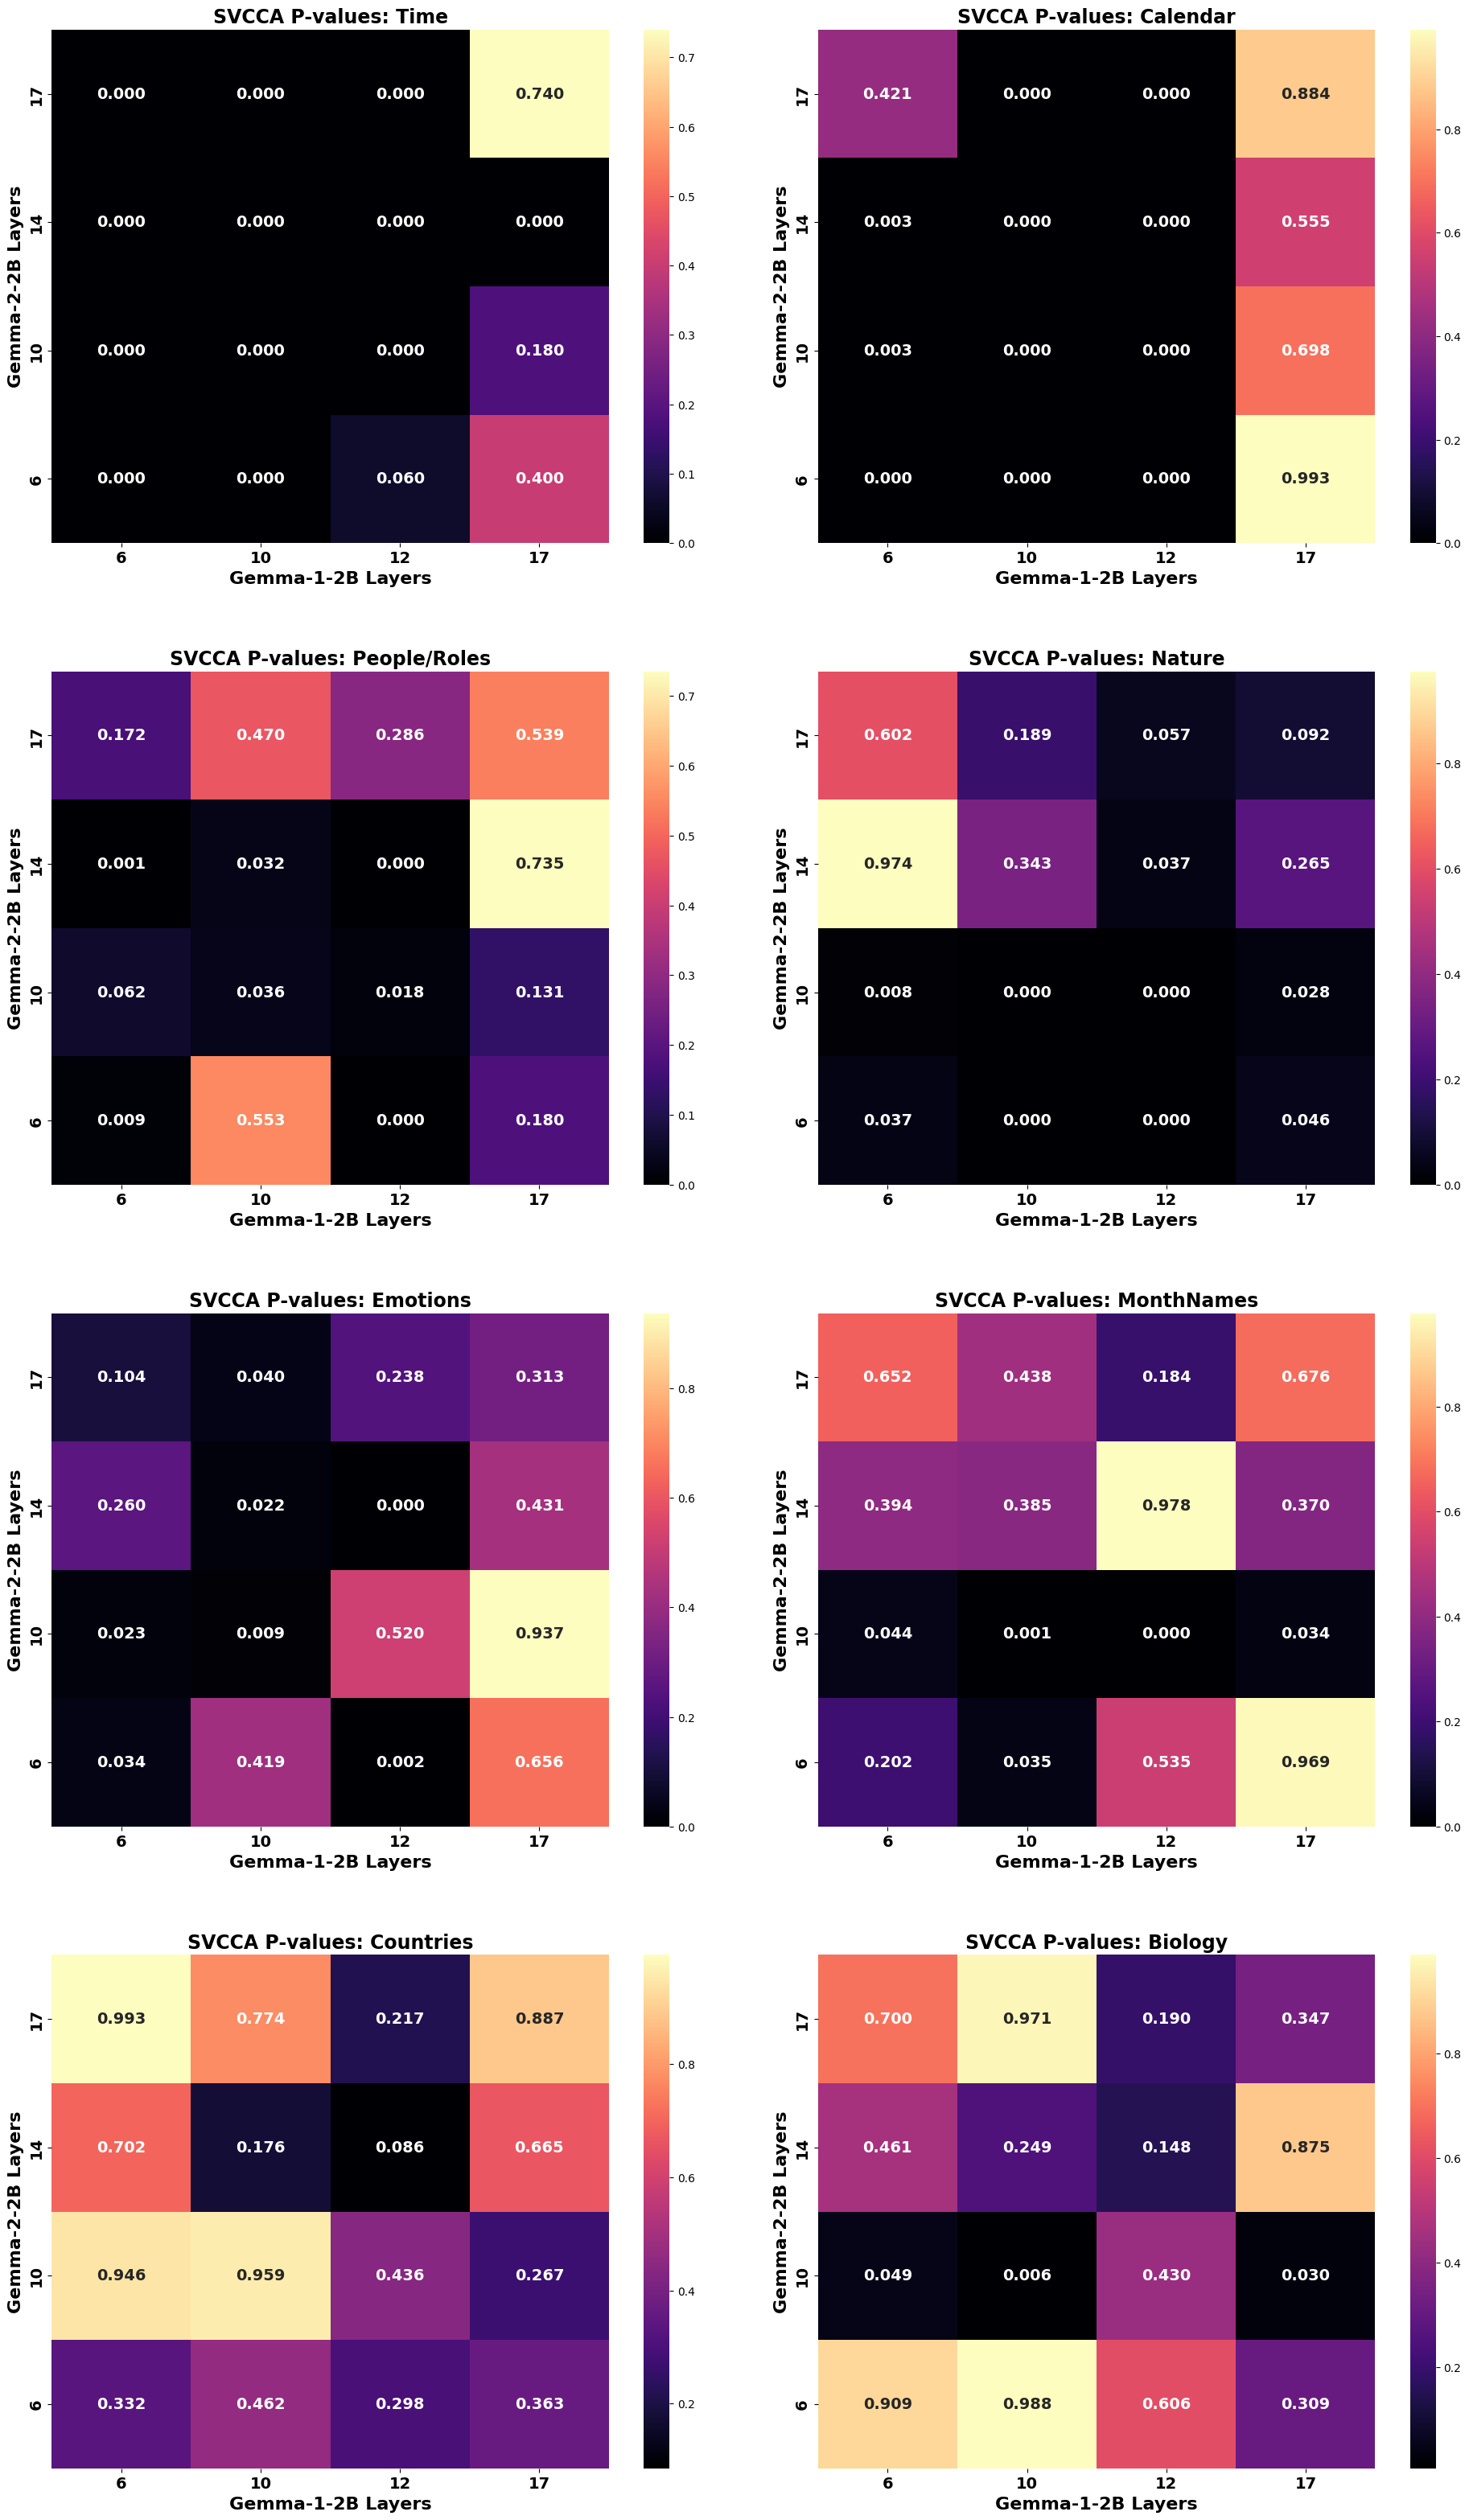

In [13]:
# Determine the size of the grid
num_concepts = len(keywords.keys())
num_cols = 2  # You can adjust this based on your preference
num_rows = (num_concepts + num_cols - 1) // num_cols  # Ensures enough rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 10, num_rows * 8))
fig.tight_layout(pad=5.0)  # Increase padding between plots

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each concept and plot
for i, concept in enumerate(keywords.keys()):

    all_scores_paired_svcca = {}

    for layerID_A, layer_to_dictscores in all_scores.items():
        layerID_A_scores = {}
        for layerID_B, scores_dict in layer_to_dictscores.items():
            if layerID_B != 0:
                score = scores_dict[concept]['rand_shuff_pval_SVCCA_1To1']
                layerID_A_scores[layerID_B] = score
        all_scores_paired_svcca[layerID_A] = layerID_A_scores

    scores_df = pd.DataFrame(all_scores_paired_svcca).T

    # Plot heatmap on subplot with customized fonts and bold titles
    ax = sns.heatmap(scores_df, ax=axes[i], annot=True, cmap='magma', cbar=True, fmt=".3f",
                     annot_kws={"size": 14, "weight": 'bold'})
    ax.set_title("SVCCA P-values: " + str(concept), fontsize=17, fontweight='bold')
    ax.set_ylabel("Gemma-2-2B Layers", fontsize=16, fontweight='bold')
    ax.set_xlabel("Gemma-1-2B Layers", fontsize=16, fontweight='bold')
    ax.invert_yaxis()

    # Customize tick labels for bold and larger size
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_fontweight('bold')

# Hide any unused axes if there are any
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

# Adjust subplot spacing (if needed)
plt.subplots_adjust(hspace=0.25, wspace=0.1)  # Adjust height and width spacing
plt.savefig('heatmap_comparison.pdf')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

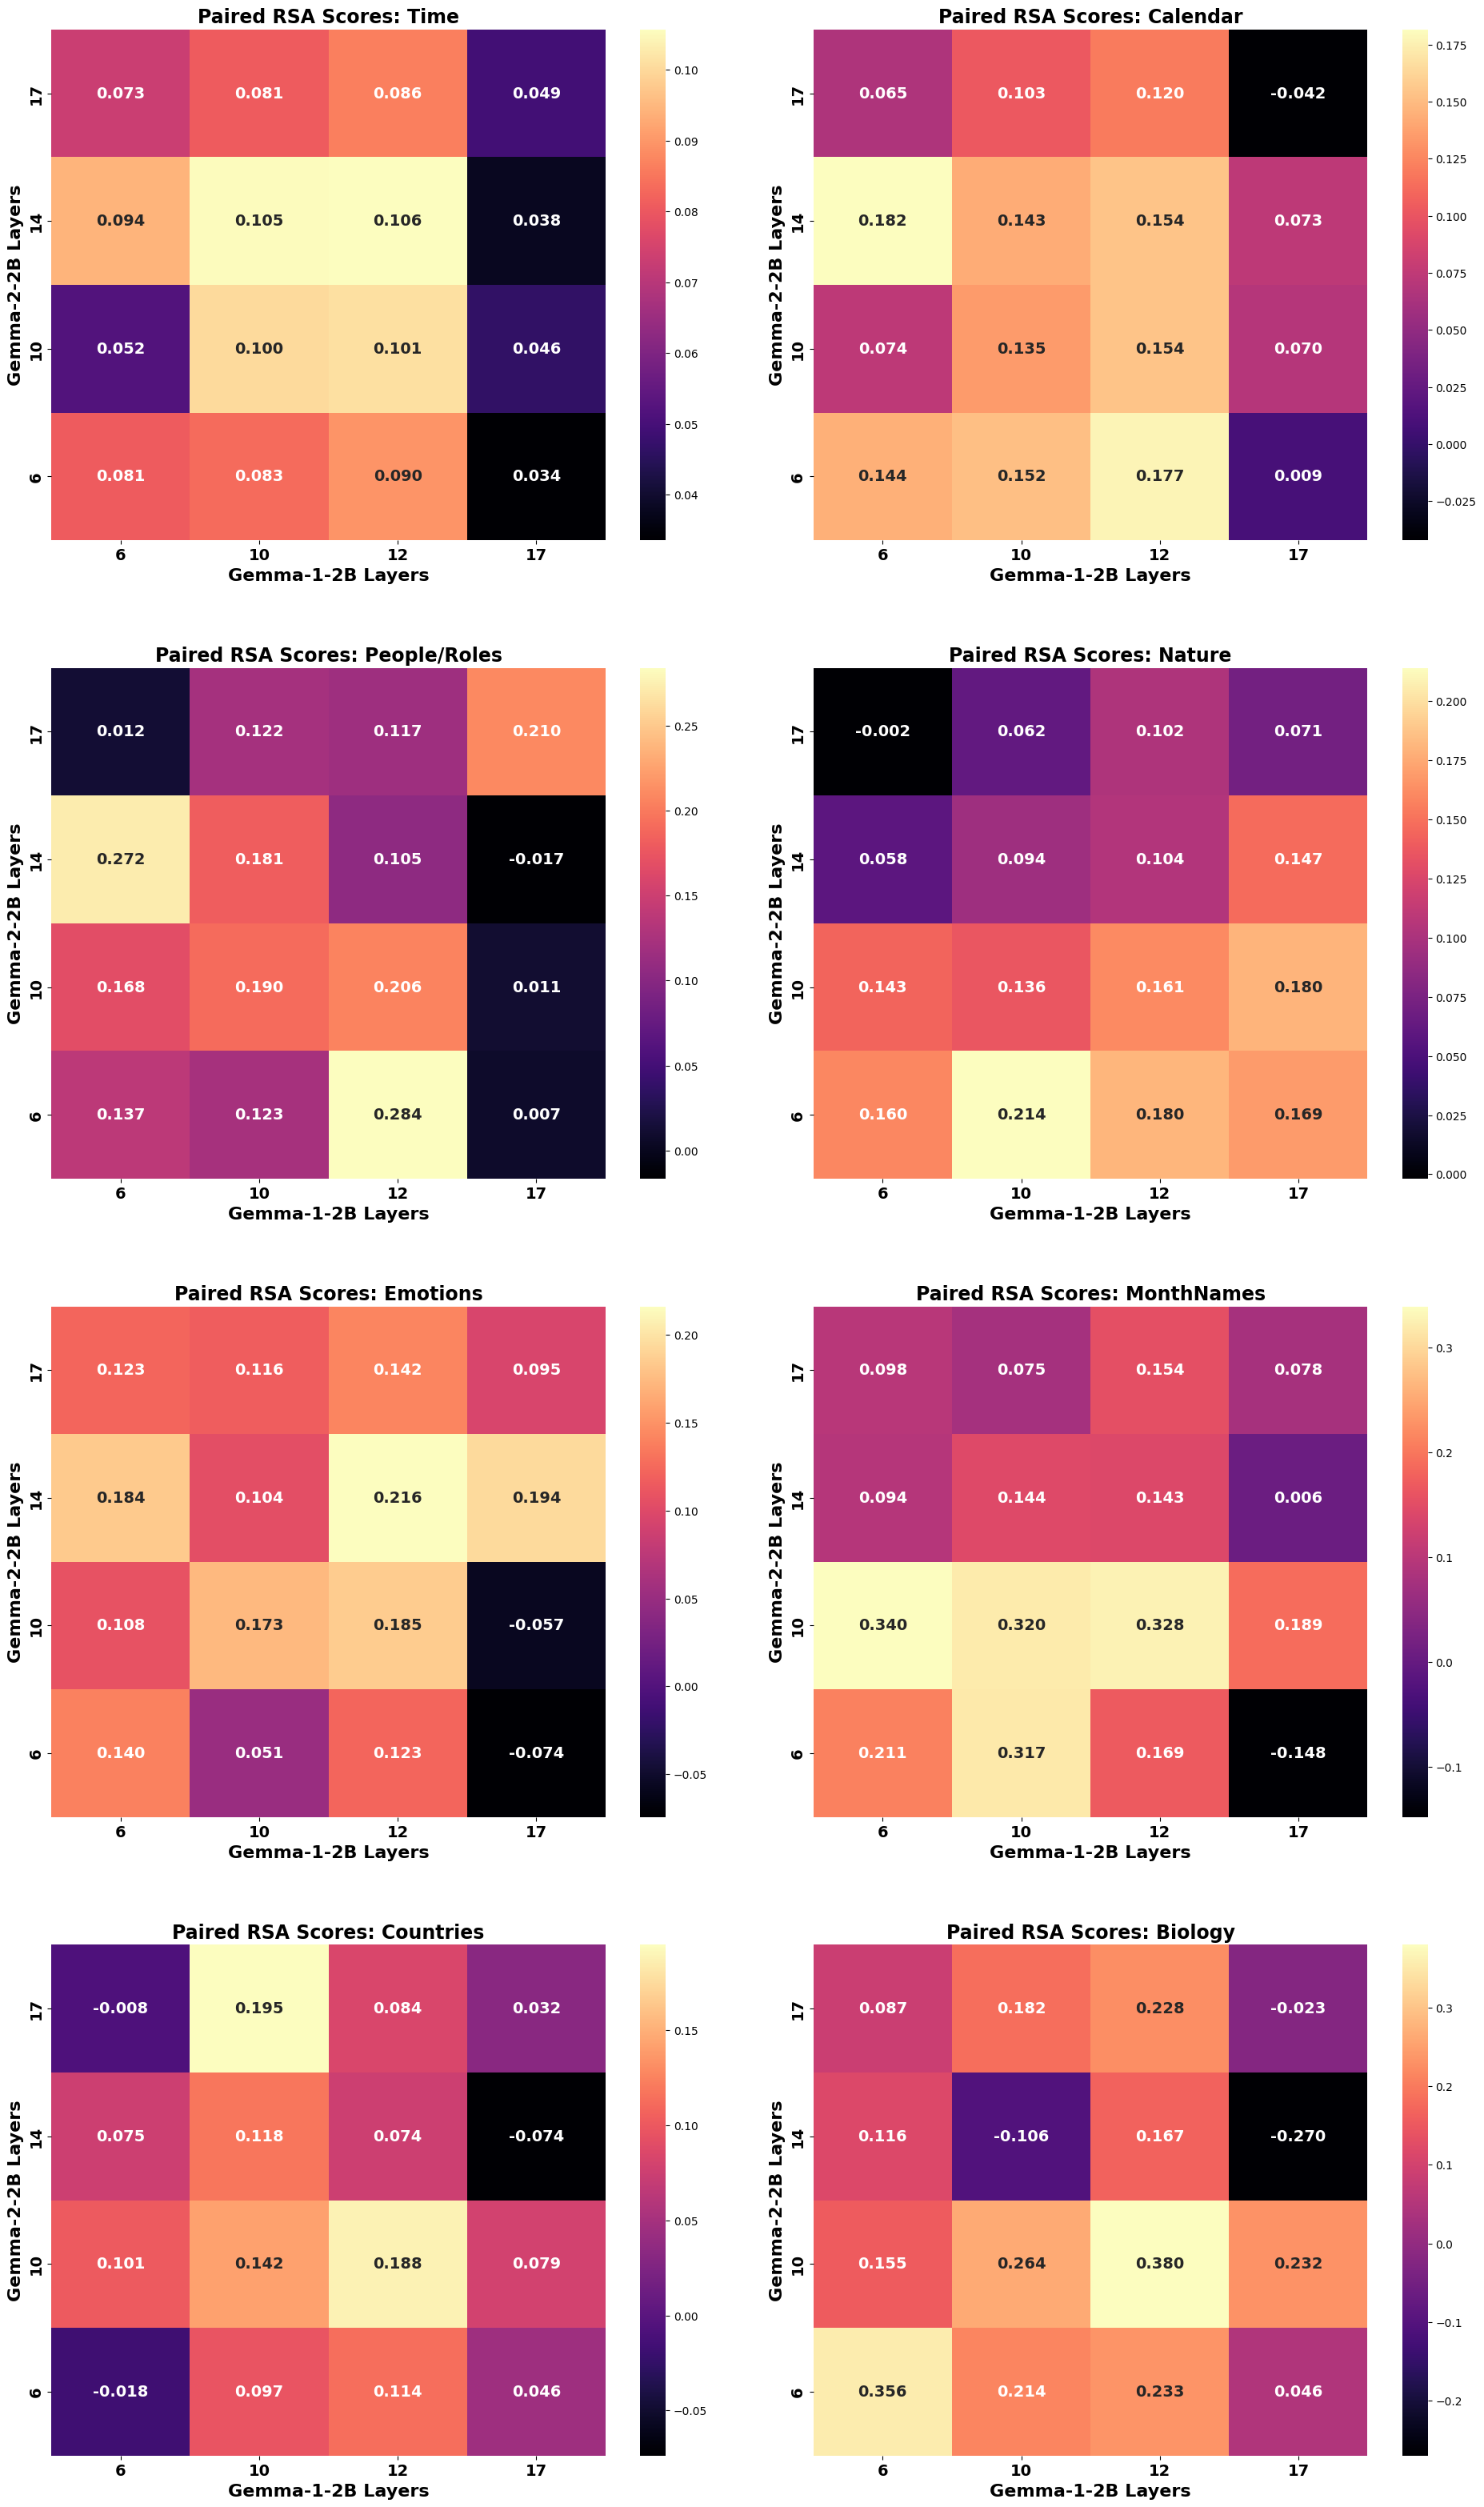

In [15]:
# Determine the size of the grid
num_concepts = len(keywords.keys())
num_cols = 2  # You can adjust this based on your preference
num_rows = (num_concepts + num_cols - 1) // num_cols  # Ensures enough rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 10, num_rows * 8))
fig.tight_layout(pad=5.0)  # Increase padding between plots

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each concept and plot
for i, concept in enumerate(keywords.keys()):

    all_scores_paired_svcca = {}

    for layerID_A, layer_to_dictscores in all_scores.items():
        layerID_A_scores = {}
        for layerID_B, scores_dict in layer_to_dictscores.items():
            if layerID_B != 0:
                score = scores_dict[concept]['paired_RSA_1To1']
                layerID_A_scores[layerID_B] = score
        all_scores_paired_svcca[layerID_A] = layerID_A_scores

    scores_df = pd.DataFrame(all_scores_paired_svcca).T

    # Plot heatmap on subplot with customized fonts and bold titles
    ax = sns.heatmap(scores_df, ax=axes[i], annot=True, cmap='magma', cbar=True, fmt=".3f",
                     annot_kws={"size": 14, "weight": 'bold'})
    ax.set_title("Paired RSA Scores: " + str(concept), fontsize=17, fontweight='bold')
    ax.set_ylabel("Gemma-2-2B Layers", fontsize=16, fontweight='bold')
    ax.set_xlabel("Gemma-1-2B Layers", fontsize=16, fontweight='bold')
    ax.invert_yaxis()

    # Customize tick labels for bold and larger size
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_fontweight('bold')

# Hide any unused axes if there are any
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

# Adjust subplot spacing (if needed)
plt.subplots_adjust(hspace=0.25, wspace=0.1)  # Adjust height and width spacing
plt.savefig('heatmap_comparison.pdf')
files.download('heatmap_comparison.pdf')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

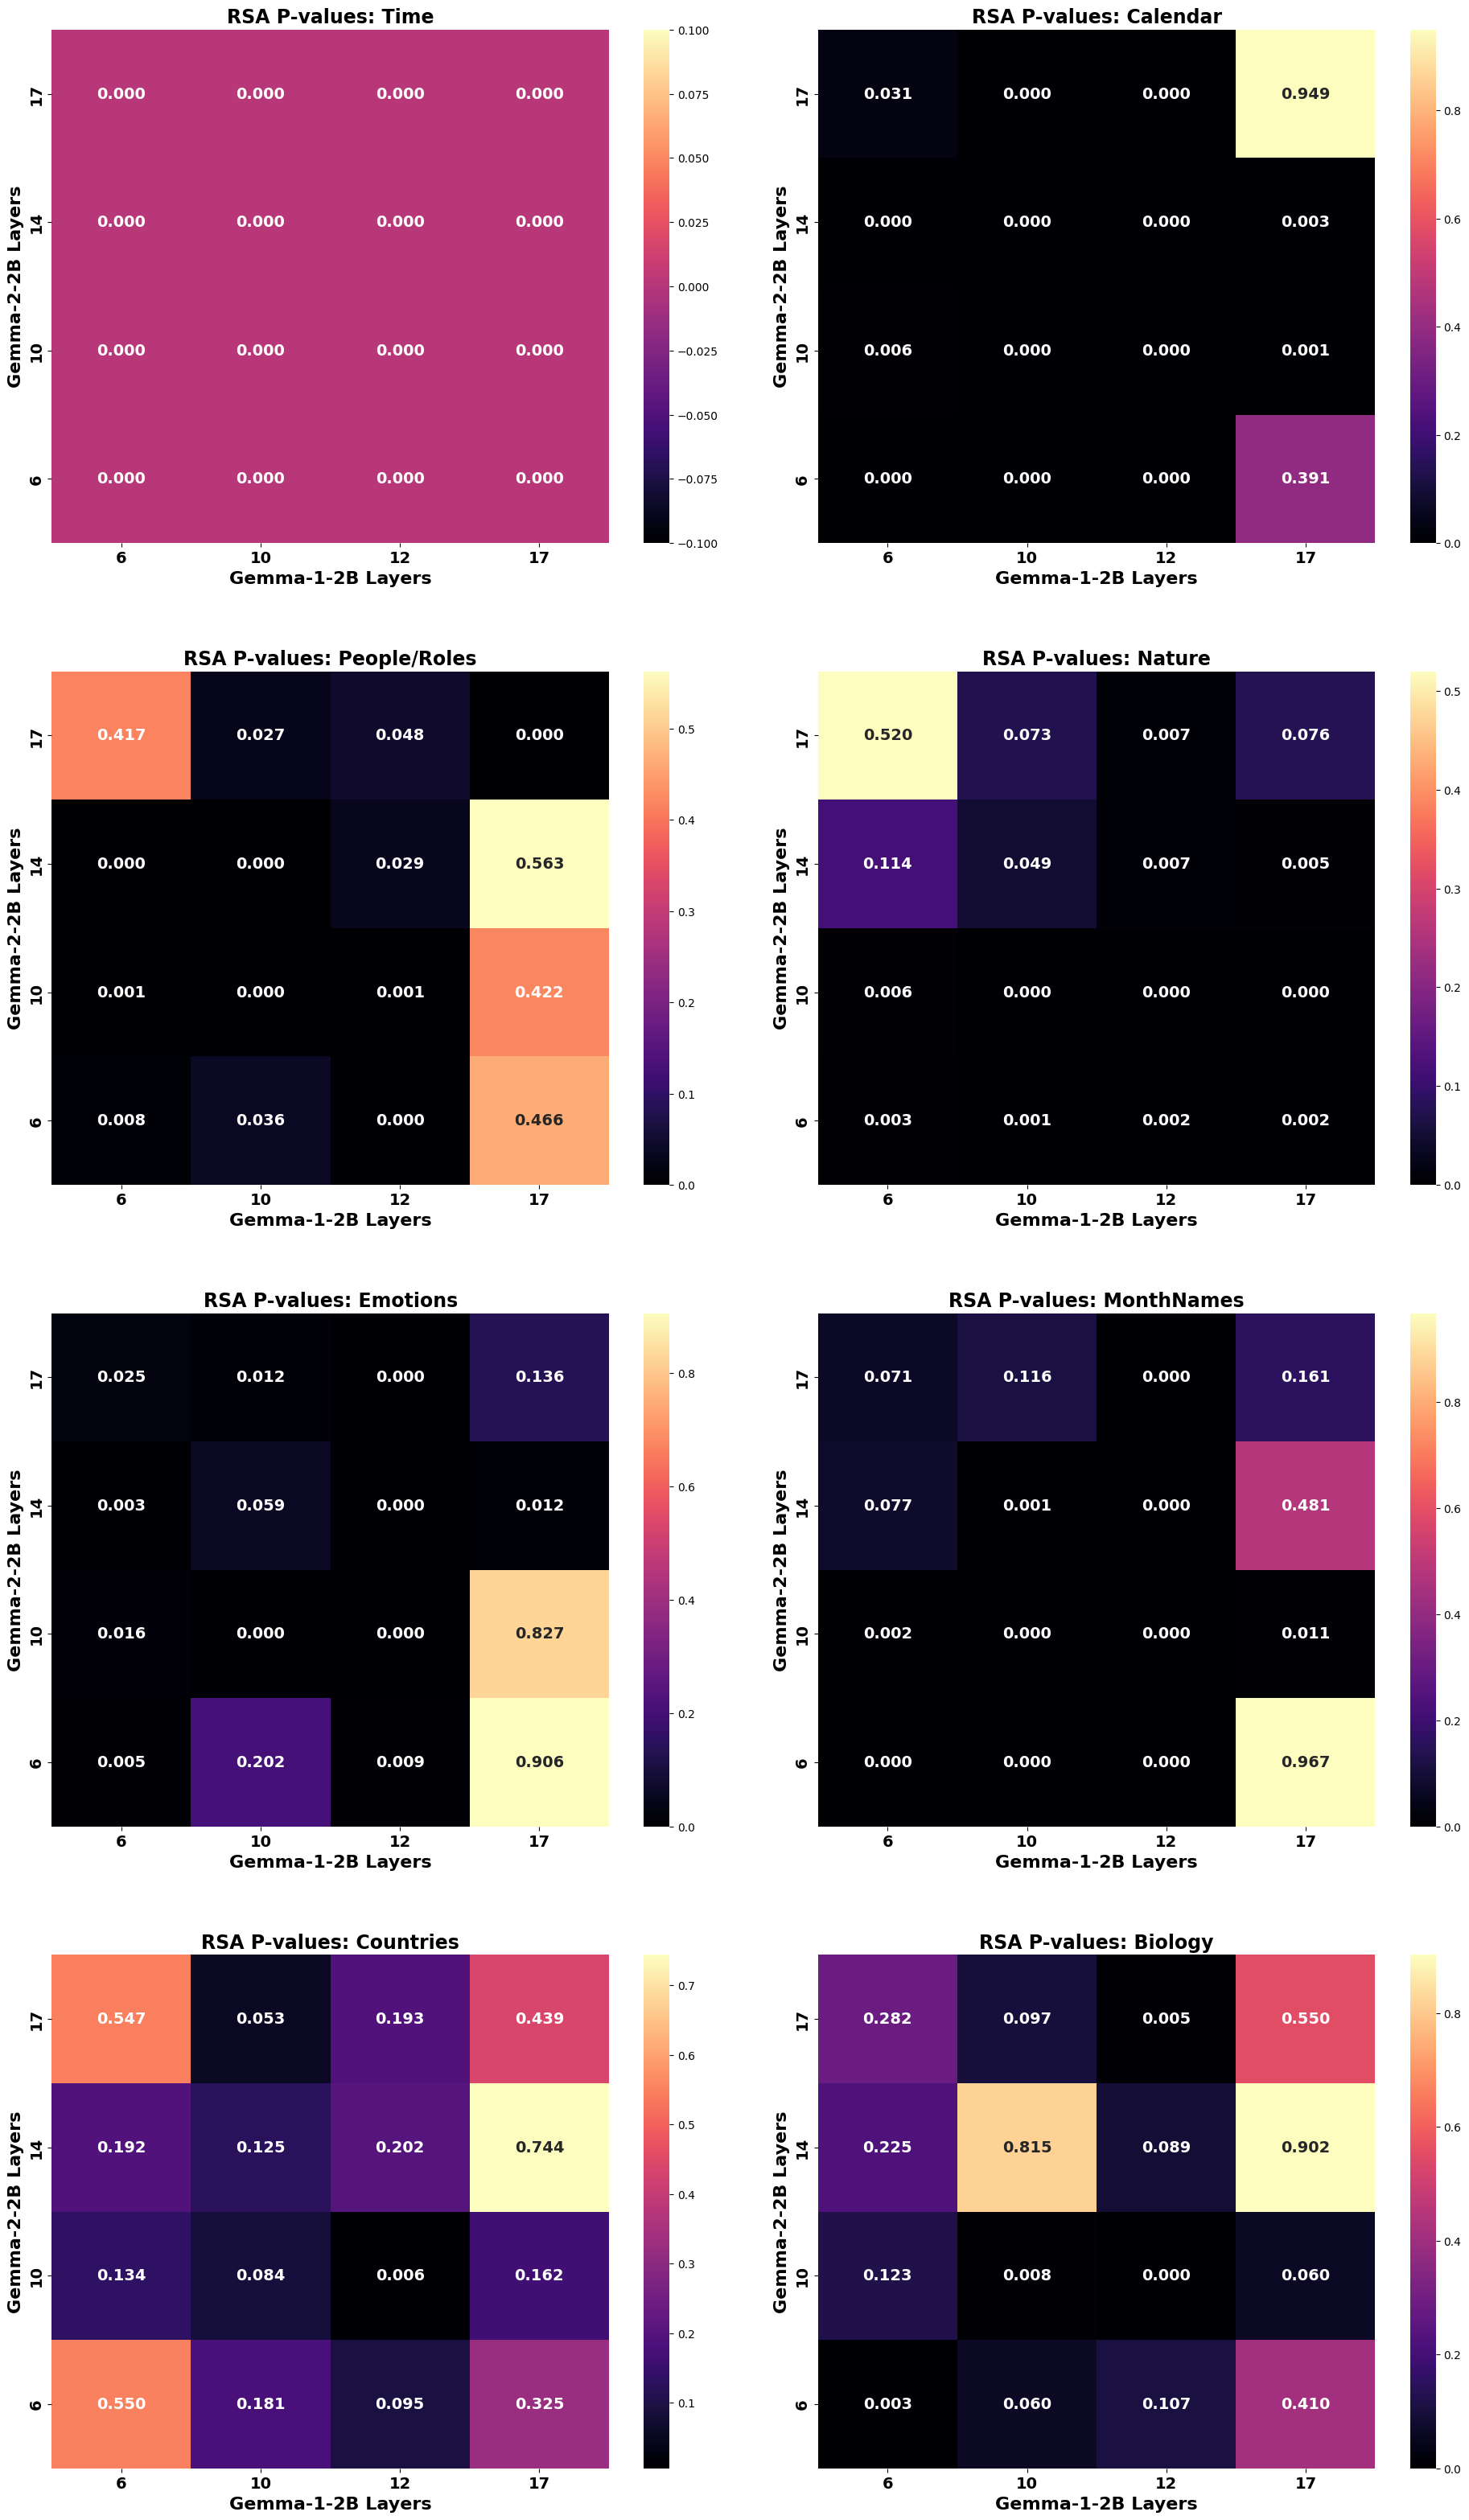

In [16]:
# Determine the size of the grid
num_concepts = len(keywords.keys())
num_cols = 2  # You can adjust this based on your preference
num_rows = (num_concepts + num_cols - 1) // num_cols  # Ensures enough rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 10, num_rows * 8))
fig.tight_layout(pad=5.0)  # Increase padding between plots

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each concept and plot
for i, concept in enumerate(keywords.keys()):

    all_scores_paired_svcca = {}

    for layerID_A, layer_to_dictscores in all_scores.items():
        layerID_A_scores = {}
        for layerID_B, scores_dict in layer_to_dictscores.items():
            if layerID_B != 0:
                score = scores_dict[concept]['rand_shuff_pval_RSA_1To1']
                layerID_A_scores[layerID_B] = score
        all_scores_paired_svcca[layerID_A] = layerID_A_scores

    scores_df = pd.DataFrame(all_scores_paired_svcca).T

    # Plot heatmap on subplot with customized fonts and bold titles
    ax = sns.heatmap(scores_df, ax=axes[i], annot=True, cmap='magma', cbar=True, fmt=".3f",
                     annot_kws={"size": 14, "weight": 'bold'})
    ax.set_title("RSA P-values: " + str(concept), fontsize=17, fontweight='bold')
    ax.set_ylabel("Gemma-2-2B Layers", fontsize=16, fontweight='bold')
    ax.set_xlabel("Gemma-1-2B Layers", fontsize=16, fontweight='bold')
    ax.invert_yaxis()

    # Customize tick labels for bold and larger size
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_fontweight('bold')

# Hide any unused axes if there are any
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

# Adjust subplot spacing (if needed)
plt.subplots_adjust(hspace=0.25, wspace=0.1)  # Adjust height and width spacing
plt.savefig('heatmap_comparison.pdf')
files.download('heatmap_comparison.pdf')
plt.show()
